# Kelompok 1 (Kelas 3A)

1. Puput Hanifah Nuranisa (11210940000017)
2. Siti Nurcholisah Dwi Rizky (11210940000009)
3. Syarifah Syila Alkadrie (11210940000019)
4. Ananda Aprilia (11210940000032)
5. Antya Alhikmah (11210940000033)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Loading Data:

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

In [3]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **A. Gabungkan Data dfJ dan dfD**

In [6]:
JD = pd.concat([dfJ, dfD])
JD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Preprocessing**

#1. Missing Value

In [7]:
JD.isnull().sum()

created_at     1782
LT             1781
LB             1783
KT             1783
KM             1783
garasi         1953
carport        1838
lokasi         1783
sertifikat     1785
listrik        1799
hadap          1924
harga          1783
URL            1783
deskripsi      1792
Unnamed: 14    2022
Unnamed: 15    2022
Unnamed: 16    2022
Unnamed: 17    2022
Unnamed: 18    2022
Unnamed: 19    2022
Unnamed: 20    2022
Unnamed: 21    2022
Unnamed: 22    2022
Unnamed: 23    2022
Unnamed: 24    2022
Unnamed: 25    2022
dtype: int64

Karena pada Unnamed 14-25 terdapat lebih Missing Value maka kita hilangkan kolom Unnamed 14-25 tersebut menggunakan drop

In [8]:
MV = JD.dropna(axis=1, how='all')
MV

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
mean = MV["harga"].mean()
MV["harga"] = MV["harga"].replace(np.nan, mean)
MV

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.549375e+09,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.549375e+09,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.549375e+09,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.549375e+09,NaN,NaN


#2. Duplicated Data

Mengecek data duplikat 

In [10]:
print(MV.shape)
MV.duplicated().sum() #melihat jumlah duplicated data pada JD (Data Gabungan Jakarta Depok)

(2022, 14)


1780

Karena adanya duplikat data pada Data JD maka dilakukan drop data untuk menghilangkan data yang duplikat

In [11]:
#menghapus entri yang memiliki data duplikat 
MV.drop_duplicates(inplace=True)
print(MV.duplicated().sum()) # menghitung jumlah data yang duplikat
print(MV.shape) # re-check by printing data size

0
(242, 14)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


#3. Outlier

In [12]:
#outlier pada kolom wind_speed
# Deteksi Outlier menggunakan nilai IQR

Q1 = MV.harga.quantile(0.25)
Q3 = MV.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 827.5
Q2 = 3500000000.0
IQR = 3499999172.5


In [13]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -5249997931.25
batas atas = 8749998758.75


Text(0.5, 1.0, 'Harga Boxplot')

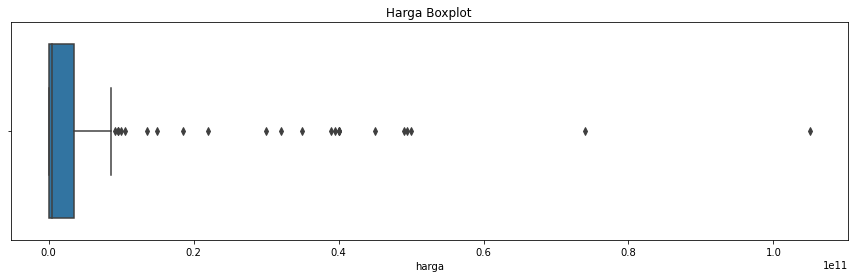

In [14]:
#Mengecek outlier menggunakan visualisasi boxplot
fig, ax = plt.subplots(figsize = (15,4))
sns.boxplot(x = MV.harga).set_title('Harga Boxplot')

In [15]:
# Deteksi Outlier menggunakan nilai IQR
Q1 = MV.harga.quantile(0.25)
Q3 = MV.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 827.5
Q2 = 3500000000.0
IQR = 3499999172.5


In [16]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -5249997931.25
batas atas = 8749998758.75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


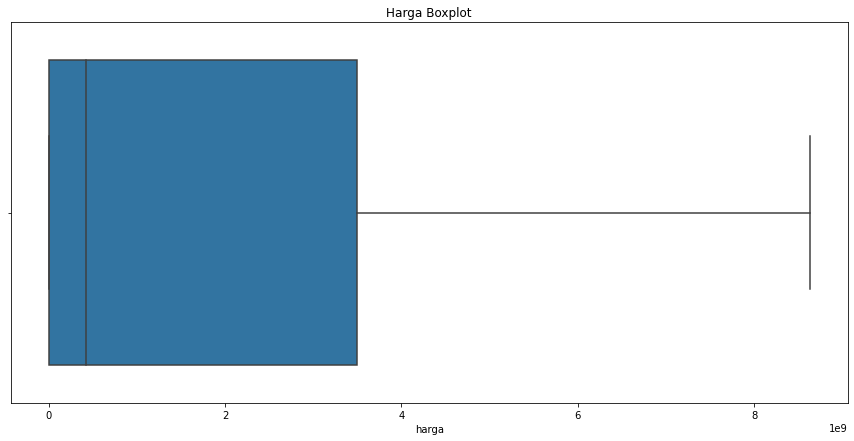

In [17]:
# handle outlier dengan replace menggantinya dengan nilai mean

MV['harga'] = MV.harga.mask(MV.harga > batasAtas, MV.harga.mean())
MV['harga'] = MV.harga.mask(MV.harga < batasBawah, MV.harga.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = MV.harga).set_title('Harga Boxplot')

#4. Statistika Deskriptif

In [18]:
# Statistika Sederhana dari data "Numerik"-nya
MV.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,240,241,239.000000,239.000000,239.000000,69.000000,184.000000,239,237,223.000000,98,2.420000e+02,239,230
unique,23,151,NaN,NaN,NaN,NaN,NaN,16,8,NaN,11,NaN,238,214
top,5-12-2021,50,NaN,NaN,NaN,NaN,NaN,Sawangan,SHM,NaN,Utara,NaN,https://www.rumah.com/listing-properti/dijual-...,Rumah 2 Lantai 2 Bangunan Gaya Art Deco di Kot...
freq,74,12,NaN,NaN,NaN,NaN,NaN,30,206,NaN,29,NaN,2,4
mean,NaN,NaN,187.230126,3.514644,2.669456,1.826087,1.809783,NaN,NaN,3911.210762,NaN,1.735101e+09,NaN,NaN
std,NaN,NaN,232.416013,1.712165,1.570322,1.464848,1.285358,NaN,NaN,6057.190639,NaN,2.241118e+09,NaN,NaN
min,NaN,NaN,15.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,4.100000e+01,NaN,NaN
25%,NaN,NaN,51.000000,2.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,8.275000e+02,NaN,NaN
50%,NaN,NaN,100.000000,3.000000,2.000000,1.000000,2.000000,NaN,NaN,2200.000000,NaN,4.225000e+08,NaN,NaN
75%,NaN,NaN,246.500000,4.500000,4.000000,2.000000,2.000000,NaN,NaN,3500.000000,NaN,3.500000e+09,NaN,NaN


# **B. Gabungkan Data dfJ dan dfT**

In [19]:
JT = pd.concat([dfJ, dfT])
JT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#1. Missing Value

In [20]:
JT.isnull().sum()

created_at      907
LT              907
LB              907
KT              907
KM              907
garasi         1070
carport         970
lokasi          907
sertifikat      911
listrik         921
hadap          1067
harga           907
URL             907
deskripsi       916
Unnamed: 14    1152
Unnamed: 15    1152
Unnamed: 16    1152
Unnamed: 17    1152
Unnamed: 18    1152
Unnamed: 19    1152
Unnamed: 20    1152
Unnamed: 21    1152
Unnamed: 22    1152
Unnamed: 23    1152
Unnamed: 24    1152
Unnamed: 25    1152
dtype: int64

Karena pada Unnamed14-25 terdapat lebih dari 50% Missing Value maka kita hilangkan kolom Unnamed14-25 tersebut menggunakan drop


In [21]:
MK = JT.dropna(axis=1, how='all')
MK

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1.000000e+03,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#2. Duplicate Data

In [22]:
print(MK.shape)
MK.duplicated().sum() #melihat jumlah duplicated data pada Data JT (Gabungan data Jakarta Tangerang)

(1152, 14)


906

In [23]:
#menghapus entri yang memiliki data duplikat 
MK.drop_duplicates(inplace=True)
print(MK.duplicated().sum()) # menghitung jumlah data yang duplikat
print(MK.shape) # re-check by printing data size

0
(246, 14)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


#3. Outlier

a. Outlier pada kolom harga

Text(0.5, 1.0, 'Harga')

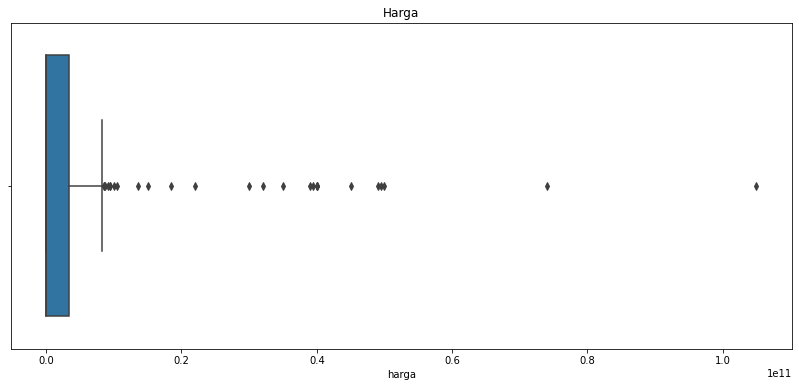

In [24]:
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(x = MK.harga).set_title('Harga')

In [25]:
# Deteksi Outlier menggunakan nilai IQR

Q1 = MK.harga.quantile(0.25)
Q3 = MK.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 1950.0
Q2 = 3400000000.0
IQR = 3399998050.0


In [26]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -5099995125.0
batas atas = 8499997075.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


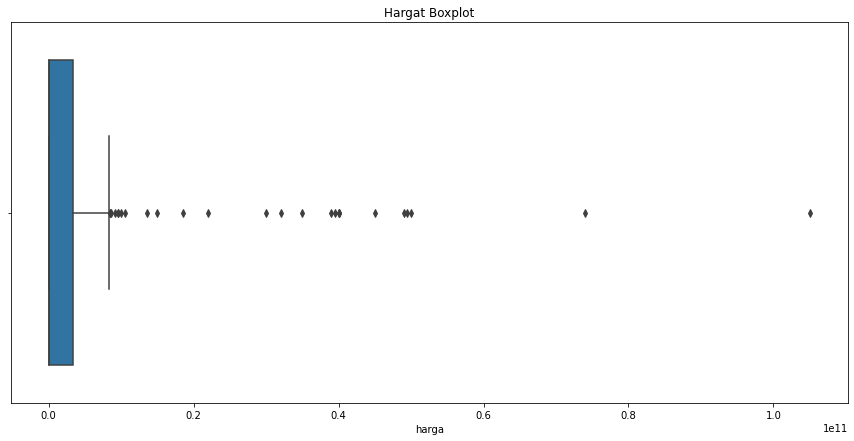

In [27]:
# handle outlier dengan replace menggantinya dengan nilai mean

MK['Harga'] = MK.harga.mask(MK.harga > batasAtas, MK.harga.mean())
MK['Harga'] = MK.harga.mask(MK.harga < batasBawah, MK.harga.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = MK.harga).set_title('Hargat Boxplot')

#4. Statistika Deskriptif

In [28]:

MK.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga,Harga
count,245.000000,245.000000,245.000000,245.000000,82.000000,182.000000,231.000000,2.450000e+02,2.450000e+02
mean,224.844898,239.004082,3.804082,3.032653,2.024390,1.780220,4722.077922,4.437963e+09,4.437963e+09
std,329.023469,277.110345,1.612701,1.549377,1.684905,1.360876,7389.109908,1.200940e+10,1.200940e+10
min,16.000000,21.000000,1.000000,1.000000,1.000000,1.000000,900.000000,9.500000e+01,9.500000e+01
25%,90.000000,88.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,1.950000e+03,1.950000e+03
50%,144.000000,154.000000,3.000000,3.000000,1.500000,1.000000,2200.000000,1.550000e+04,1.550000e+04
75%,250.000000,300.000000,5.000000,4.000000,2.000000,2.000000,4400.000000,3.400000e+09,3.400000e+09
max,3422.000000,2500.000000,10.000000,10.000000,10.000000,10.000000,66000.000000,1.050000e+11,1.050000e+11


In [29]:
# Statistika Sederhana dari data "Numerik"-nya
MK.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Harga
count,245,245.000000,245.000000,245.000000,245.000000,82.000000,182.000000,245,241,231.000000,85,2.450000e+02,245,236,2.450000e+02
unique,22,NaN,NaN,NaN,NaN,NaN,NaN,46,9,NaN,12,NaN,244,223,NaN
top,12-06-2021,NaN,NaN,NaN,NaN,NaN,NaN,"BSD, TANGERANG",SHM,NaN,Utara,NaN,https://www.rumah.com/listing-properti/dijual-...,Dekat dengan berbagai fasilitas seperti :\nSek...,NaN
freq,102,NaN,NaN,NaN,NaN,NaN,NaN,27,186,NaN,28,NaN,2,8,NaN
mean,NaN,224.844898,239.004082,3.804082,3.032653,2.024390,1.780220,NaN,NaN,4722.077922,NaN,4.437963e+09,NaN,NaN,4.437963e+09
std,NaN,329.023469,277.110345,1.612701,1.549377,1.684905,1.360876,NaN,NaN,7389.109908,NaN,1.200940e+10,NaN,NaN,1.200940e+10
min,NaN,16.000000,21.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,9.500000e+01,NaN,NaN,9.500000e+01
25%,NaN,90.000000,88.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,1.950000e+03,NaN,NaN,1.950000e+03
50%,NaN,144.000000,154.000000,3.000000,3.000000,1.500000,1.000000,NaN,NaN,2200.000000,NaN,1.550000e+04,NaN,NaN,1.550000e+04
75%,NaN,250.000000,300.000000,5.000000,4.000000,2.000000,2.000000,NaN,NaN,4400.000000,NaN,3.400000e+09,NaN,NaN,3.400000e+09


# Kesimpulan


*   Berdasarkan preprocessing data yang telah diolah, perusahaan memiliki kualitas data yang akurat dan bervariasi.

*   Dari data yang ada, terdapat kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain yaitu rumah dengan harga senilai 1.050000e+11 dikarenakan luas tanah, luas bangunan, kamar tidur dan kamar mandi memiliki keunggulan dibandingkan rumah lainnya.


*   Rumah yang paling banyak dijual yaitu rumah yang berlokasi di BSD CITY Tangerang dan Sawangan dengan karakteristik luas tanah yang tidak terlalu besar, listrik tidak terlalu mahal, harga terjangkau dan memiliki akses yang mudah.

*   Rekomendasi rumah yang akan berpotensi menghasilkan keuntungan bagi perusahaan jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok adalah BSD CITY Tangerang.



